In [2]:
import cv2
import time
import datetime

In [7]:
URLS = [0,0,0,0]

start = time.time()

for idx, url in enumerate(URLS):
    cap = cv2.VideoCapture(url)
    ret, frame = cap.read()
    time.sleep(2)
    while cap.isOpened():
        ret, frame = cap.read()
        cv2.imwrite('cam-' + str(idx) + '.jpg', frame)
        time.sleep(1)
        break
    cap.release()

end = time.time()
print('Time Used: ' + str(end - start))

Time Used: 6.8418309688568115


In [3]:
import sys
import time

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

w, h = model_wh('0x0')
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(w, h))

image = common.read_imgfile('./home.jpg', None, None)
image_h, image_w = image.shape[:2]
t = time.time()
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
elapsed = time.time() - t
log = []
centers = {}
for human in humans:
    # draw point
    for i in range(common.CocoPart.Background.value):
        if i not in human.body_parts.keys():
            continue
        body_part = human.body_parts[i]
        center = (int(body_part.x * image_w + 0.5), int(body_part.y * image_h + 0.5))
        centers[i] = center
    print(centers)
img = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
cv2.imshow('frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[2019-09-20 17:50:36,118] [TfPoseEstimator] [INFO] loading graph from /home/yinghuit/Documents/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=432x368)
I0920 17:50:36.118309 140561465644864 estimator.py:310] loading graph from /home/yinghuit/Documents/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=432x368)


one human---------------
{0: (1690, 206), 1: (1604, 300), 2: (1580, 308), 3: (1512, 430), 5: (1626, 288), 6: (1674, 452), 7: (1742, 544), 14: (1674, 186), 15: (1686, 190), 16: (1608, 194)}
one human---------------
{0: (300, 356), 1: (186, 438), 2: (202, 448), 3: (1512, 430), 5: (154, 418), 6: (1674, 452), 7: (1742, 544), 14: (290, 334), 15: (1686, 190), 16: (224, 340)}
one human---------------
{0: (690, 414), 1: (582, 498), 2: (598, 506), 3: (1512, 430), 5: (556, 492), 6: (1674, 452), 7: (1742, 544), 14: (678, 396), 15: (1686, 190), 16: (624, 402)}
one human---------------
{0: (1340, 272), 1: (1232, 366), 2: (1242, 380), 3: (1512, 430), 5: (556, 492), 6: (1674, 452), 7: (1742, 544), 14: (1320, 254), 15: (1686, 190), 16: (1260, 256)}
one human---------------
{0: (1006, 174), 1: (886, 266), 2: (1242, 380), 3: (1512, 430), 5: (556, 492), 6: (1674, 452), 7: (1742, 544), 14: (992, 154), 15: (1686, 190), 16: (928, 166)}


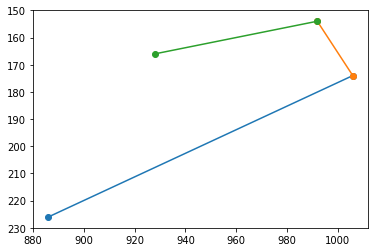

In [24]:
import matplotlib.pyplot as plt

x1, y1 = [886, 1006], [226, 174]
x2, y2 = [1006, 992], [174, 154]
x3, y3 = [992, 928], [154, 166]
plt.ylim(230, 150) #opencv y-axis descending
plt.plot(x1, y1, x2, y2, x3, y3, marker = 'o')
plt.show()